![Python](assets/python-logo-generic.svg)
### Function
#### 김응섭

## Outline
* Function syntax
* First-class citizen
* Reference semantics
* 함수 가공
* Generator
* Wrap-up

## Function syntax
* Definition
* call
* return
* default value
* 가변 인자

## Function definition
* code block도 하나의 object
* code block은 arguments를 가질 수 있다
* function은 code block에 대한 reference
* function은 value를 return할 수 있다
    * 생략하면 None이 return 된다고 가정

```python
def <function_name>(<arguments>):
    <code block>
    return <return_value>   # optional
```

## Keyword: pass
* 빈 code block을 나타낼 때 사용

In [36]:
def empty_func():
    pass

## Function call
* () 연산자를 통해서 함수 실행
    * () 연산자가 정의된 모든 object를 callable
* function call은 expression의 구성원

In [1]:
def inc(x):
    return x+1

r = inc(2)*2 + 10
print(r)

16


## keyword argument
* call할 때, argument_name = value 형태로 지정 가능

In [2]:
def acc(x, y, z):
    return x + y + z

print(acc(1, 2, z=3))

6


## keyword argument
* keyword argument가 한 번 나오면, 그 뒤의 argument는 모두 keyword 형태여야 한다

In [5]:
def acc(x, y, z):
    return x + y + z

print(acc(2, 3, x=1))   # illegal

TypeError: acc() got multiple values for argument 'x'

In [6]:
print(acc(1, y=2, 3))   # illegal

SyntaxError: positional argument follows keyword argument (<ipython-input-6-f1fdbfee63d4>, line 1)

## keyword only argument
* `*` 뒤에 정의된 argument는 keyword argument 형태로 pass해야 한다

In [1]:
def compare(a, b, *, key=None):
    pass

compare(1, 2)
compare(1, 2, key='name')
compare(1, 2, 'name')     #illegal

TypeError: compare() takes 2 positional arguments but 3 were given

## Return
* return value가 생략되면 None이 리턴된다
* 여러 값을 리턴할 때는 tuple로 넘긴다

In [7]:
def no_ret_func(a):
    print('argument a:', a)

def multi_ret_func(a, b):
    return a+b, a*b

a = 2; b = 3
r0 = no_ret_func(a)
s, m = multi_ret_func(a, b) # returned tuple is unpacked
print(r0)
print(s, m)

argument a: 2
None
5 6


## Return: sentinel
* 허용되지 않는 argument가 들어오면 조기에 return 할 수 있다

In [9]:
def inc_int(x):
    if not isinstance(x, int):  # sentinel
        return
    return x+1

s = inc_int('s')
print(s)

None


## Default value
* call할 때 건네주지 않은 argument에 default value를 지정할 수 있다
* 함수의 기능을 확장
    * default value를 갖는 argument 추가를 통해,
    * 기존 function call을 수정하지 않아도 기능 확장이 가능하다

In [10]:
def acc(x, y, init=0):
    return init + x + y

print(acc(1, 2))
print(acc(1, 2, init=10))   # init is optional

3
13


## Default value
* default value가 지정된 첫 argument 다음에 오는 모든 argument에는 default value를 지정해야 한다

In [11]:
def add(a, b=0, c):
    return a+b+c

r = add(1, 2)    # 2는 b에 할당? c에 할당?

SyntaxError: non-default argument follows default argument (<ipython-input-11-ca7f9af31ed4>, line 1)

## 가변 인자 (positional)
* argument 개수가 가변하게 만들 수 있다
* 가변 인수 앞에 ```*```를 붙인다
* 가변 인수는 tuple 

In [12]:
def acc(init, *args):
    s = init
    for x in args:
        s += x
    return s

print(acc(100, 1, 2, 3, 4))  # 100 + 4*(4+1)/2 == 110

110


## 가변 인자 (keyword)
* 가변 keyword argument 앞에 `**`를 붙인다
* 가변 keyword argument는 dict

In [13]:
def acc(init, *args, **kwargs):
    s = init
    for x in args:
        s += x
    for x in kwargs.values():
        s += x
    return s

print(acc(100, 1, 2, x=3, y=4))

110


## First-class citizen
* 의미
* switch 구현
* function property
* callback
* lambda

## First-class citizen
* 변수에 할당되는 data처럼 다뤄지는 object들을 말함
* 아래 조건을 만족해야 한다.
  * 변수나 collection에 담을 수 있다
  * argument로 전달 가능하다
  * return value로 사용할 수 있다
  * reference와 관계 없이 고유한 구별이 가능하다
  * 동적으로 property 할당이 가능하다

_(from wikipedia)_

## First-class citizen
* Python function is a first-class citizen
  * 함수도 보통의 data처럼 여길 수 있다
  * int object가 숫자를 표현한다면, function은 code block을 표현
  * function object는 assignment가 아니라 def로 생성되는 것이 다름

## First-class citizen
* 변수나 collection에 담을 수 있다
* reference과 관계 없이 고유한 구별이 가능하다

In [38]:
def inc(x):
    return x + 1

a = inc         # a, inc 모두 inc(x) 함수를 가리킴
print(id(inc))  # Built-in function, id()는 object의 고유한 숫자를 돌려줌
print(id(a))    # id is a built-in function
print(a(1))

140512645559568
140512645559568
2


## switch 구현
* Function은 collection에 담을 수 있다
* Switch 구현
    * switch condition을 dict의 key로 사용

In [39]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

func_map = {0: add, 1: sub}

user_input = 1
r = func_map[user_input](4, 3)
print(r)

1


## Docstring
* 함수를 설명하는 string property
    * 여러 줄로 표현하는 경우가 많음
* `__doc__` 속성으로 접근할 수 있다

In [40]:
def add(x, y):
    '''Adding two values'''
    return x + y

print(add.__doc__)
add.__doc__ = 'Adding x + y'
print(add.__doc__)

Adding two values
Adding x + y


## Built-in function, dir()
* object의 property list를 돌려주는 built-in function

In [41]:
def add(x, y):
    '''Adding two values'''
    return x + y

print(dir(add))
assert '__doc__' in dir(add)

['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


## Function property
* 동적으로 property 할당이 가능하다

In [1]:
def add(x, y):
    '''Adding two values'''
    return x + y

assert not 'xyz' in dir(add)
add.xyz = 4
assert 'xyz' in dir(add)
print(add.xyz)
add(2, 3)

4


5

## callback
* function도 argument로 전달 가능하다
* 사용처
  * 알고리즘은 동일하고, type이나 조건에 따라서 일부 operation만 변경해야 할 때 
  * event가 발생했을 때, 수행해야 하는 동작을 등록

## callback

In [43]:
def conditional_caller(x, y, func):
    if x >= y:
        return func(x, y)
    else:
        return 0

def sub(a, b):
    return a - b

a = 2; b = 9
p = conditional_caller(a, b, sub)
z = conditional_caller(b, a, sub)
print(p, z)

0 7


## lambda
* 익명 함수라고도 불림
* Python에서는 하나의 expression으로만 정의할 수 있음
  * code block을 indentation으로 나타내기 때문에 생긴 제약

```python
lambda <argument_list>: expression
```

## lambda
* function도 argument로 전달 가능하다
* argument로 lambda를 전달할 수 있다

In [44]:
def conditional_caller(x, y, func):
    if x >= y:
        return func(x, y)
    else:
        return 0

a = 2; b = 9
z = conditional_caller(b, a, lambda x, y: x - y)
print(z)

7


## 함수를 인자로 받는 내장 함수
* 함수 대신에 lambda를 이용하면 coding 및 읽기 편함

In [45]:
student_tuples = [  #(name, grade, age)
    ('john', 'A', 15),
    ('jane', 'B', 12),
    ('dave', 'B', 10)]
ss = sorted(student_tuples, key=lambda student: student[2]) # sort by age
print(ss)

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]


## Reference semantics
* ref to immutable obj
* ref to mutable obj
* scope
* call-by-reference

## ref to immutable obj

In [15]:
# a와 b가 동일한 immutable obj를 가리킴
a = 1
b = 1
assert id(a) == id(b)

In [151]:
from graphviz import Source

src_text = '''
digraph {
rankdir=LR;
node [shape=box];
a -> 1;
b -> 1;
a [shape=oval];
b [shape=oval];
}
'''
ref_strait = Source(src_text, format='svg', filename='ref_strait', directory='rendered_image')
ref_strait.render()  

'rendered_image/ref_strait.svg'

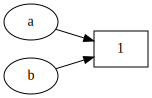

In [152]:
ref_strait

## ref to immutable obj

In [47]:
# a와 b가 동일한 immutable obj를 가리킴
a = 1
b = a
assert id(a) == id(b)

# b에 다른 immutable obj를 할당
b = 2
print(a, b)
assert id(a) != id(b)

1 2


In [144]:
from graphviz import Source

src_text = '''
digraph {
rankdir=LR;
node [shape=box];

b [shape=oval];
2 [shape=box];
b -> 2;

a [shape=oval];
1 [shape=box];
a -> 1;

}
'''
ref_crossed = Source(src_text, format='svg', filename='ref_crossed', directory='rendered_image')
ref_crossed.render()  

'rendered_image/ref_crossed.svg'

| ![](rendered_image/ref_strait.svg)  | ![](http://www.iconhot.com/icon/png/devine/64/arrow.png) | ![](rendered_image/ref_crossed.svg) |
|:----|:----|:----|
| `a = 1; b = 1` | | `a = 1; b = 2` |

## ref to mutable obj

In [17]:
# a와 b가 동일한 mutable obj를 가리킴
a = [1, 2, 3]
b = a
# b가 가리키는 obj를 변경함
b.append(4)
# a가 가리키는 obj도 동일
print(a)
print(b)
assert a == b

[1, 2, 3, 4]
[1, 2, 3, 4]


## ref to mutable obj

In [145]:
from graphviz import Source

src_texts = []

src_texts.append('''
digraph {
rankdir=LR;

a [label="a", shape=plaintext]

list [shape=record, label="{1|2|3}"]
a -> list;
}
''')

src_texts.append('''
digraph {
rankdir=LR;

a_ [label="a", shape=plaintext];
b_ [label="b", shape=plaintext];
list_ [shape=record, label="{1|2|3}"]

a_ -> list_;
b_ -> list_;
}
''')

src_texts.append('''
digraph {
rankdir=LR;

a__ [label="a", shape=plaintext];
b__ [label="b", shape=plaintext];

list__ [shape=record, label="{1|2|3|4}"]

a__ -> list__;
b__ -> list__;
}
''')


# Source(src_text)
[Source(t, format='svg', filename='ref_list%d' % i, directory='rendered_image').render() for i, t in enumerate(src_texts)]

['rendered_image/ref_list0.svg',
 'rendered_image/ref_list1.svg',
 'rendered_image/ref_list2.svg']

|                             |                            |
|:-------------------:|:------------------:|
| `a = [1, 2, 3]`      | ![](rendered_image/ref_list0.svg) |
| `b = a`               | ![](rendered_image/ref_list1.svg)|
| `a.append(4)` | ![](rendered_image/ref_list2.svg)|

## 리스트 복제
* 리스트를 복제할 때는 새로운 리스트를 만들어서 넘겨줌: `l[:]`
* 그러나 이것은 shallow copy임

In [154]:
# b는 a의 복제판을 가리킴
a = [1, 2, 3]
b = a[:]
# b가 가리키는 obj를 변경함
b.append(4)
# a가 가리키는 obj는 변하지 않음
print(a)
print(b)
assert a != b

[1, 2, 3]
[1, 2, 3, 4]


## 리스트 복제

In [146]:
from graphviz import Source

src_texts = []

src_texts.append('''
digraph {
rankdir=LR;

a [label="a", shape=plaintext]

list [shape=record, label="{1|2|3}"]
a -> list;
}
''')

src_texts.append('''
digraph {
rankdir=LR;

b_ [label="b", shape=plaintext];
a_ [label="a", shape=plaintext];

list_ [shape=record, label="{1|2|3}"]
list__ [shape=record, label="{1|2|3}"]

a_ -> list_;
b_ -> list__;
}
''')

src_texts.append('''
digraph {
rankdir=LR;

b_ [label="b", shape=plaintext];
a_ [label="a", shape=plaintext];

list_ [shape=record, label="{1|2|3}"]
list__ [shape=record, label="{1|2|3|4}"]

a_ -> list_;
b_ -> list__;
}
''')


# Source(src_texts[2])
[Source(t, format='svg', filename='copy_list%d' % i, directory='rendered_image').render() for i, t in enumerate(src_texts)]

['rendered_image/copy_list0.svg',
 'rendered_image/copy_list1.svg',
 'rendered_image/copy_list2.svg']

|                             |                            |
|:-------------------:|:------------------:|
| `a = [1, 2, 3]`      | ![](rendered_image/copy_list0.svg) |
| `b = a[:]`            | ![](rendered_image/copy_list1.svg)|
| `b.append(4)` | ![](rendered_image/copy_list2.svg)|

## 참고: is vs ==
* ==는 equal 여부를 판단
* is는 identical 여부를 판단

In [2]:
a = [1, 2, 3]
b = [1, 2, 3]
assert a == b
assert a is not b

In [3]:
a = [1, 2, 3]
b = a
assert a == b
assert a is b

## Scope
* Function에서 만들어진 변수는 function 내에서만 유효
* Function 밖으로 나가면 function local variable은 사라짐
    * 다른 ref가 없다면 object도 사라짐 
* Function 내에서 function 외부의 data를 읽을 수 있음

In [19]:
a = 1
def func(x):
    return x+a
b = func(3)
print(b)

4


## Call-by-value
* Argument passing할 때 variable을 copy하여 넘김 (a = b처럼)
* 그러나, copy되는 것은 object 자체가 아니라, pointer임

In [147]:
from graphviz import Source

src_text = '''
digraph {
rankdir=LR;
node [shape=box];
a -> I;
b -> I;
a [shape=oval];
b [shape=oval];
I [style=filled, margin=0.2, label = "An instance of\nSomeClass(): \nx = 3 -> 4"]
}
'''
call_by_value_to_some_class = Source(src_text)

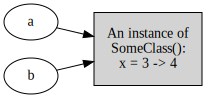

In [153]:
call_by_value_to_some_class

In [4]:
class SomeClass: pass
#a가 object의 reference이기 때문에, function 내부 변경이 외부에도 반영됨
a = SomeClass() #mutable object
a.x = 3
def func(a):
    assert a.x == 3
    a.x = 4
func(a)
assert a.x == 4

## Local variable
* 함수 내부에서 만드는 변수
* Function 내에서만 유효
* 함수 내부 assignment
  * 의미: local variable 선언
  * (함수 외부 변수에 값을 할당하는 것이 아님)

## Local variable

In [149]:
from graphviz import Source

src_text = '''
digraph {
rankdir=LR;
node [shape=box];

a [shape=oval, label="a"];
a -> 3;

b [shape=oval, label="func.a"];
3 [shape=box];
b -> 3;
}
'''
# Source(src_text)
local_var_left = Source(src_text, format='svg', filename='local_var_left', directory='rendered_image')
local_var_left.render()  

'rendered_image/local_var_left.svg'

In [150]:
from graphviz import Source

src_text = '''
digraph {
rankdir=LR;
node [shape=box];

b [shape=oval, label="func.a"];
4 [shape=box];
b -> 4;

a [shape=oval, label="a"];
3 [shape=box];
a -> 3;
}
'''
# Source(src_text)
local_var_right = Source(src_text, format='svg', filename='local_var_right', directory='rendered_image')
local_var_right.render()  

'rendered_image/local_var_right.svg'

In [21]:
# function 내부에서 argument에 assign하면,
# local a의 ref가 바뀌기 때문에, 외부에는 반영되지 않음
a =3
def func(a):
    a = 4
    assert a == 4
func(a)
assert a == 3

| ![](rendered_image/local_var_left.svg)  | ![](http://www.iconhot.com/icon/png/devine/64/arrow.png) | ![](rendered_image/local_var_right.svg) |
|---:|:---:|:----|
| func(a) 호출 직후 | | func(a)에서 리턴된 후 |

## Emulation of call-by-reference
* Python에서는 call-by-reference를 제공하지 않음
* Mutable object를 통해서 call-by-reference 가능
    * 그러나 이렇게 쓰지 말 것을 권고함

In [22]:
a = [1]
def func(x):
    x[0] += 1
func(a)
assert a == [2]

## Avoiding call-by-reference
* arg 변경 후에 변경된 obj를 return 

In [23]:
a = 1
def func(x):
    return x + 1
a = func(a)     # interface 변경에 주의
assert a == 2

## Keyword: global
* 함수 내부 assign이 외부 변수에 값을 할당하는 것을 의미한다는 것을 선언
* (특정 variable이 외부 변수를 의미한다는 것을 선언)
* global의 의미는 module scope로 한정
  * 다른 .py에서 global 변수에 assign 불가
* 사용하지 않기를 추천
  * argument passing + return + assign을 대신 사용

## Keyword: global

In [47]:
a = 3
def func():
    global a
    a = 4
    assert a == 4
func()
assert a != 3
assert a == 4

## 함수 가공
* nested function
* functools
* decorator
* ~~closure~~

## nested function
* function 내부에서 function 정의 가능
* function을 function의 return value로 사용 가능

In [48]:
def bind_one(func, val):
    def mod_func(x):
        return func(x, val)
    return mod_func

def add(x, y):
    return x + y

inc = bind_one(add, 1)
r = inc(1)
assert r == 2

## Keyword: nonlocal
* Nested function의 특정 variable가 부모 함수에 선언된 변수를 의미한다는 것을 선언

In [49]:
a = 3
def enclosing():
    a = 4
    assert a == 4
    def nested():
        nonlocal a
        a = 5
    nested()
    assert a == 5
enclosing()
assert a == 3

## functools
* Standard library로 function을 인자로 받거나 리턴하는 함수 모음
* functools.partial
    * Arg 중에 하나를 특정 값으로 고정한 function을 리턴

In [50]:
from functools import partial
def func(a, b):
  return a + b
inc = partial(func, 1)
assert inc(1) == 2

## decorator
* Function을 가공하는 function class의 축약형

```python
@my_decorator
def func(a, b):
    return a + b

# 아래와 의미가 같다:
def func(a, b):
    return a + b
func = my_decorator(func)
```

## decorator: example

In [51]:
def my_decorator(func):
    def callf(*args, **kwargs):
        return func(1, *args, **kwargs)
    return callf
@my_decorator
def func(a, b):
    return a + b
assert func(2) == 3

## closure
* local 환경까지 포함한 function context

In [52]:
def wrapper(a):
    def func(x):
        return a + x    #func가 call될 때까지 a가 숫자로 대치되지 않는다
    return func
a = 1
another = wrapper(a) #another에는 wrapper호출 당시의 a를 보존하고 있음
a = 10
assert another(2) == 3
assert another.__closure__[0].cell_contents == 1

## closure 생성
* nested function을 만들어야 한다 (local scope만 closure에 보관)
* nested function이 local scope (enclosing function 내부)의 변수를 참조해야 한다
* enclosing function은 만들어진 nested function을 리턴해야 한다

## closure example

In [53]:
def foo():
    def bar():
        print(spam)

    spam = 'ham'
    bar()
    spam = 'eggs'
    bar()
    return bar

b = foo()
print('---')
b()

ham
eggs
---
eggs


## closure가 아닌 예제

In [54]:
def wrapper():
    def func(x):
        return a + x
    return func
a = 1
another = wrapper()
a = 10
print(another(2))   # func.a는 global x를 참조
print(another.__closure__)

12
None


## Generator
* generator
* ~~coroutine~~
* itertools

## generator
* yield를 만날 때마다 값을 출력하고, 함수의 수행을 일지 정지하는 함수
* generator에서는 return을 사용하지 않는다
* generator의 call 자체는 generator object를 돌려주고, 내부 코드를 수행하지 않는다.
* generator object에 next()를 수행시키면 yield를 만날 때까지 수행하고 정지한다
* 더 이상 yield할 것이 없으면 StopIteration exception을 발생시킨다

## generator example

In [7]:
def gen(n):
    print('prepare')
    for i in range(n):
        yield i
gen_func = gen(2)
print('--')
print(next(gen_func))
print('--')
print(next(gen_func))
print('--')
print(next(gen_func))

--
prepare
0
--
1
--


StopIteration: 

## generator example
* `next(iterable, defalut_value=None)`
  * default_value를 지정하면, generater 종료시에 StopIteration이 일어나지 않고, default_value를 리턴함

In [8]:
gen_func = gen(2)
print('--')
print(next(gen_func, -1))
print('--')
print(next(gen_func, -1))
print('--')
print(next(gen_func, -1))

--
prepare
0
--
1
--
-1


## generator example
* generator는 iterable하다
    * element의 리스트를 모두 만들고 연산하는 것이 아니라 필요할 때 element를 만들어서 효율적임

In [25]:
def gen(n):
    print('prepare')
    for i in range(n):
        yield i

for i in gen(5):
    print(i)    #0부터 4까지 한 줄씩 출력

prepare
0
1
2
3
4


## coroutine
* Generator와 동작 방식은 비슷하고, 방향은 반대
    * yield로 값을 입력 받음
* 외부에 값을 입력하기 전에 coroutine을 init
* 외부에서 send를 통해 값을 coroutine으로 입력

## coroutine

In [26]:
def co_func():
    print('prepare')
    while True:
        print((yield) + 1)
cof = co_func()
print('--')
next(cof)   #이것을 통해 첫 번째 (yield)까지 수행
print('--')
cof.send(0)
cof.send(1)

--
prepare
--
1
2


## itertools
* iterator를 돌려주는 function을 정의하는 built-in module
* chain: generator를 결합

In [28]:
from itertools import chain

# for i in range(0, 2) + range(4, 6):   #TypeError
for i in chain(range(0, 2), range(4, 6)):   #3 제외
    print(i)

0
1
4
5


## Wrap-up
* Function is a first-class citizen
* Variable is a reference to an object
* Generator
    * yield program control
    * Generator is iterable